## Исследование данных о российском кинопрокате



**Заказчик:** Министерство культуры Российской Федерации. 

**Задача:** Изучение рынка российского кинопроката и выявление текущих трендов. 

**Приоритеты:** Уделение внимания фильмам, которые получили государственную поддержку. Поиск ответа на вопрос, насколько такие фильмы интересны зрителю. 

**Контекст и детали:**  Исследование проведено на основе данных, опубликованных на портале открытых данных Министерства культуры. Набор этих данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Открытие файлов с данными и объедининие их в один датафрейм. 

**Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.**

Загрузим библиотеку pandas и ряд других библиотек.

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Запишем файлы с данными датасета mkrf_movies и mkrf_shows  в соответствующие переменные.

In [ ]:

data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Теперь создадим удобную функцию для изучения основной информации о датасетах.

In [3]:
def info_plus(df):
    display(df.head(10))
    df.info()

Рассмотрим data_movies.

In [ ]:
info_plus(data_movies)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Text(0, 0.5, 'Частота')

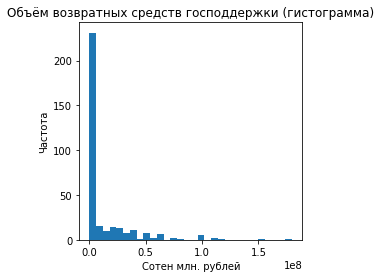

In [5]:
display(data_movies['refundable_support'].describe())
data_movies['refundable_support'].plot(kind='hist', bins=30, title='Объём возвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

Text(0, 0.5, 'Частота')

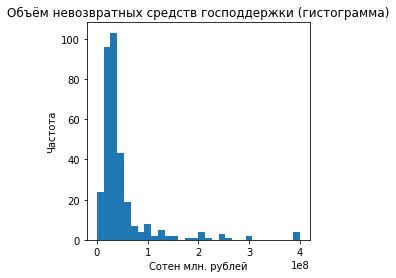

In [6]:
display(data_movies['nonrefundable_support'].describe())
data_movies['nonrefundable_support'].plot(kind='hist', bins=30, title='Объём невозвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

Text(0, 0.5, 'Частота')

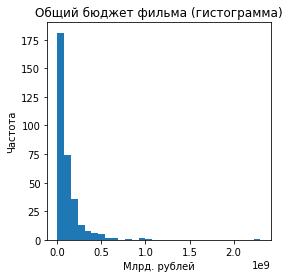

In [7]:
display(data_movies['budget'].describe())
data_movies['budget'].plot(kind='hist', bins=30, title='Общий бюджет фильма (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд. рублей')
plt.ylabel('Частота')

Рассмотрим data_shows.

In [8]:
info_plus(data_shows)
#data_shows.hist(bins=30, figsize=(6, 4))

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


count         3,158.00
mean    120,187,475.32
std      12,383,941.15
min     111,000,113.00
25%     113,000,191.75
50%     121,013,114.50
75%     121,028,317.75
max     224,026,410.00
Name: puNumber, dtype: float64

Text(0, 0.5, 'Частота')

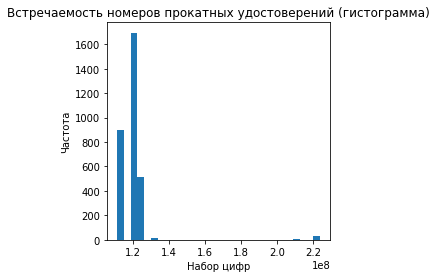

In [9]:
display(data_shows['puNumber'].describe())
data_shows['puNumber'].plot(kind='hist', bins=30, title='Встречаемость номеров прокатных удостоверений (гистограмма)', figsize=(4, 4))
plt.xlabel('Набор цифр')
plt.ylabel('Частота')

count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64

Text(0, 0.5, 'Частота')

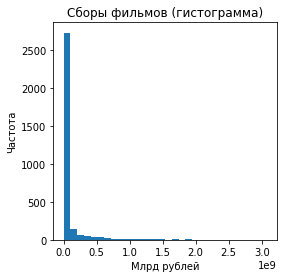

In [10]:
display(data_shows['box_office'].describe())
data_shows['box_office'].plot(kind='hist', bins=30, title='Сборы фильмов (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд рублей')
plt.ylabel('Частота')

Рассмотрим, насколько можно использовать 'puNumber', как ключ к объединению таблиц.

In [11]:
display(data_movies.shape[0])
data_movies['puNumber'].nunique()

7486

7484

Значит есть два дубля в data_movies['puNumber'], посмотрим, что же это за дубли.

In [12]:
data_movies['puNumber'].value_counts().head()

221054410    2
221154310    2
121002115    1
124005219    1
121028519    1
Name: puNumber, dtype: int64

Посмотрим в каких строках этих дубли.

In [13]:
data_movies.query('puNumber in ["221054410", "221154310"]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Видим, что все 4 фильма - разные. Переделывать номера прокатных удостоверений точно не стоит так, как это усложнит использование результатов исследования, что оптимальней делать с этими дубликатами попробуем решить уже после объединения в единный датафрейм.

Аналогично проверим data_shows['puNumber'].

In [14]:
display(data_shows.shape[0])
data_shows['puNumber'].nunique()

3158

3158

Здесь без дублей.

Единственное столбцы 'puNumber' в двух датасетах, разных типов. Проверим можо ли их сделать в data_movies типом  int.

In [15]:
data_movies['puNumber'] = data_movies['puNumber'].astype('int', errors='ignore')
data_movies.dtypes

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

Значит среди data_movies['puNumber'], есть не только номера в виде целых чисел, вместе с тем, что это категориальная переменная значит в свою очередь data_shows['puNumber'] переведём в строки.

In [16]:
data_shows['puNumber'] = data_shows['puNumber'].astype('str', errors='ignore')
data_shows.dtypes

puNumber       object
box_office    float64
dtype: object

Объединим данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. Причем сделаем так, что часть 'puNumber' в data_shows может не попасть, потому что если будет номер удостоверения и сборы без какой-либо дополнительной информации - это будет неинформативно для нашего исследования, а значит не нужно. Для удобства сохраним объединённый датафрейм в переменную joint_data.

In [17]:
joint_data = data_movies.merge(data_shows, on='puNumber', how='left')

 Посмотрим основную информацию data.

In [ ]:
info_plus(joint_data)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Text(0, 0.5, 'Частота')

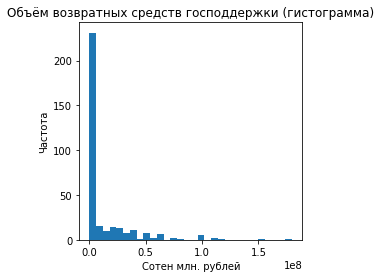

In [20]:
display(joint_data['refundable_support'].describe())
joint_data['refundable_support'].plot(kind='hist', bins=30, title='Объём возвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

Text(0, 0.5, 'Частота')

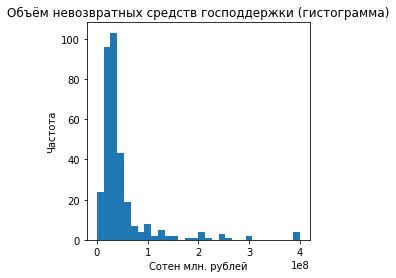

In [21]:
display(joint_data['nonrefundable_support'].describe())
joint_data['nonrefundable_support'].plot(kind='hist', bins=30, title='Объём невозвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

Text(0, 0.5, 'Частота')

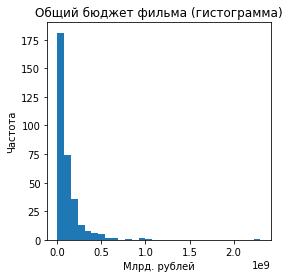

In [22]:
display(joint_data['budget'].describe())
joint_data['budget'].plot(kind='hist', bins=30, title='Общий бюджет фильма (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд. рублей')
plt.ylabel('Частота')

count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64

Text(0, 0.5, 'Частота')

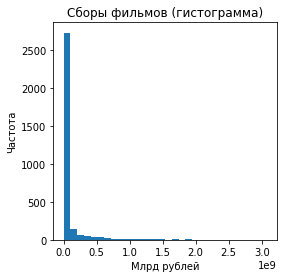

In [23]:
display(joint_data['box_office'].describe())
joint_data['box_office'].plot(kind='hist', bins=30, title='Сборы фильмов (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд рублей')
plt.ylabel('Частота')

Вернёмся к уже найденным дублям и увидим, что в таблице нет данных по их сборам.

In [24]:
joint_data.query('puNumber in ["221054410", "221154310"]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Так как уже явно "проблемных" по данному параметру puNumber всего 4 из  7486, и в двух из них ошибка, а сборов нет ни в одном из них, можем спокойно удалить их из датафрейма даже до основной предобработки, чтобы они не мешали анализу. Так как joiny_data пригодиться как исходный объединённый датасет для сопоставления "было/стало" введём переменную data куда будем сохранять данные после мер по предобработки.

In [25]:
data = joint_data.query('puNumber not in ["221054410", "221154310"]')
data.shape

(7482, 16)

Готово. А теперь рассмотрим данные обединённого датафрейма до основной предобработки, и зафиксируем особенности в кратком описании.

In [ ]:
info_plus(data)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7482 non-null   object 
 1   puNumber               7482 non-null   object 
 2   show_start_date        7482 non-null   object 
 3   type                   7482 non-null   object 
 4   film_studio            7464 non-null   object 
 5   production_country     7480 non-null   object 
 6   director               7473 non-null   object 
 7   producer               6914 non-null   object 
 8   age_restriction        7482 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6515 non-null   object 
 14  genres                 6506 non-null   object 
 15  box_

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7482 non-null   object 
 1   puNumber               7482 non-null   object 
 2   show_start_date        7482 non-null   object 
 3   type                   7482 non-null   object 
 4   film_studio            7464 non-null   object 
 5   production_country     7480 non-null   object 
 6   director               7473 non-null   object 
 7   producer               6914 non-null   object 
 8   age_restriction        7482 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6515 non-null   object 
 14  genres                 6506 non-null   object 
 15  box_

**Первые выводы:**

- **'ratings'** - тип данных некорректный, а должно быть вещественное число.
- **'show_start_date'** некорректный тип данных, а должна быть дата.
- остальные корректный.

Важно также, что пропуски заполнены вещественным  NaN. Что стоит в определенных ситуациях корректировать.

- **'title', 'puNumber', 'type', 'age_restriction', 'show_start_date'** - нет пропусков.
- **'film_studio', 'production_country', 'director'** - очень маленькое количество пропусков.
- **'producer', 'genres', 'ratings'** - заметной части данных не хватает.
- **'box_office'** больше половины данных не хватает.
- **'refundable_support', 'nonrefundable_support', 'budget','financing_source'** - данных немного, но все эти строки отдельный класс данных (госфинансирование), которые сами по себе полные.

По количественным данным с учетом количества пропусков и присутствию аномалий, что видно на графиках, выводы будут сделаны позднее после базовых действий по предобработке.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типа данных

- Проверка типов данных в датафрейме и преобразование их там, где это необходимо.

**Исходя из блока "первые выводы" преобразуем 'ratings' - в вещественное число, а затем
'show_start_date' в дату.**

In [28]:
data.loc[:,'ratings'] = pd.to_numeric(data['ratings'], errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7482 non-null   object 
 1   puNumber               7482 non-null   object 
 2   show_start_date        7482 non-null   object 
 3   type                   7482 non-null   object 
 4   film_studio            7464 non-null   object 
 5   production_country     7480 non-null   object 
 6   director               7473 non-null   object 
 7   producer               6914 non-null   object 
 8   age_restriction        7482 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6515 non-null   object 
 14  genres                 6506 non-null   object 
 15  box_

После первой попытки перевести тип данных не удалось, проанализируем почему.

In [29]:
data['ratings'].value_counts()

6.6    312
6.7    308
6.8    260
7.2    252
6.2    243
      ... 
1.2      1
64%      1
1.9      1
8.9      1
1.3      1
Name: ratings, Length: 94, dtype: int64

Посмотрим подробнее.

In [30]:
display(data['ratings'].value_counts().head(50))
display(data['ratings'].value_counts().tail(50))

6.6    312
6.7    308
6.8    260
7.2    252
6.2    243
7.1    241
6.9    233
7.0    233
6.1    232
6.5    212
6.3    207
5.8    205
6.4    201
6.0    197
7.4    196
7.7    189
7.6    184
7.3    179
5.9    170
5.7    159
7.9    157
5.6    156
7.5    150
7.8    148
8.0    123
5.2     97
5.3     93
5.5     91
8.1     86
5.4     83
5.1     81
8.2     71
4.8     65
4.9     61
4.7     49
4.3     49
5.0     47
4.6     42
3.9     37
4.1     32
4.5     30
8.5     29
4.2     28
8.3     27
4.4     23
4.0     21
8.6     20
3.8     19
3.7     16
8.4     15
Name: ratings, dtype: int64

4.4    23
4.0    21
8.6    20
3.8    19
3.7    16
8.4    15
3.2    11
2.9    10
3.5    10
8.7     9
3.0     8
3.3     8
3.4     7
8.8     7
2.8     6
2.4     6
1.6     5
2.6     5
2.7     4
99%     4
3.1     4
91%     3
97%     3
3.6     3
1.5     3
2.5     3
94%     3
88%     3
83%     3
1.7     2
1.4     2
79%     2
2.1     2
1.1     2
9.0     2
98%     2
1.0     1
28%     1
9.2     1
90%     1
1.8     1
19%     1
9.1     1
89%     1
62%     1
1.2     1
64%     1
1.9     1
8.9     1
1.3     1
Name: ratings, dtype: int64

Видим часть рейтингов (около 30 штук) записана в виде процентов, мы можем удалить строки с этими рейтингами так как их очень мало, но при этом восстановить, что имеллось под 99% - 9.9 или 0.99 в каждом конкретном случае исходя из имеющихся данных не представляется возможным.

Для этого проработаем все не NaN значения. Для этого введём вспомогательный датафрейм i_data и преобразуем все значения рейтингов в строки, ведь только так можно будет преобразовать их в список и обработать.

In [31]:
i_data = data[data['ratings'].notna()]
i_data.loc[:,'ratings'] = i_data.loc[:,'ratings'].astype('str', errors='ignore')

Создадим вспомогательную функцию для присвоения рейтинга "ошибочный" каждой записи с рейтингом в процентах.

In [32]:
def unpercent(i):
    j = i.replace(' ','') #избавимся от пробелов, если они есть
    j = list(j)
    
    if j[-1] == '%':
        j =  'ошибочный'
    else:
        j = ''.join(j)
    return(j)

Теперь обработаем функцией вспомогательный датасет i_data. Присвоим данные из него обратно в data. И проверим, что проценты преобразовались "ошибочный".

In [33]:
i_data.loc[:,'ratings'] = i_data['ratings'].apply(unpercent)
data[data['ratings'].notna()] = i_data
display(data['ratings'].value_counts().head(50))
display(data['ratings'].value_counts().tail(50))

6.6          312
6.7          308
6.8          260
7.2          252
6.2          243
7.1          241
7.0          233
6.9          233
6.1          232
6.5          212
6.3          207
5.8          205
6.4          201
6.0          197
7.4          196
7.7          189
7.6          184
7.3          179
5.9          170
5.7          159
7.9          157
5.6          156
7.5          150
7.8          148
8.0          123
5.2           97
5.3           93
5.5           91
8.1           86
5.4           83
5.1           81
8.2           71
4.8           65
4.9           61
4.3           49
4.7           49
5.0           47
4.6           42
3.9           37
4.1           32
4.5           30
8.5           29
ошибочный     29
4.2           28
8.3           27
4.4           23
4.0           21
8.6           20
3.8           19
3.7           16
Name: ratings, dtype: int64

8.2          71
4.8          65
4.9          61
4.3          49
4.7          49
5.0          47
4.6          42
3.9          37
4.1          32
4.5          30
8.5          29
ошибочный    29
4.2          28
8.3          27
4.4          23
4.0          21
8.6          20
3.8          19
3.7          16
8.4          15
3.2          11
2.9          10
3.5          10
8.7           9
3.0           8
3.3           8
8.8           7
3.4           7
2.8           6
2.4           6
2.6           5
1.6           5
3.1           4
2.7           4
3.6           3
1.5           3
2.5           3
1.7           2
9.0           2
2.1           2
1.4           2
1.1           2
1.0           1
1.8           1
8.9           1
1.3           1
1.9           1
1.2           1
9.2           1
9.1           1
Name: ratings, dtype: int64

Всё корректно, а теперь удалим строки с рейтингом "ошибочный".

In [34]:
data = data.query('ratings != "ошибочный"')

Проверим, что всё корректно с data.

In [35]:
info_plus(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7453 non-null   object 
 1   puNumber               7453 non-null   object 
 2   show_start_date        7453 non-null   object 
 3   type                   7453 non-null   object 
 4   film_studio            7435 non-null   object 
 5   production_country     7451 non-null   object 
 6   director               7444 non-null   object 
 7   producer               6885 non-null   object 
 8   age_restriction        7453 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       330 non-null    object 
 13  ratings                6486 non-null   object 
 14  genres                 6480 non-null   object 
 15  box_

Всё корректно, теперь попробуем преобразавать тип данных в столбце рейтингов в float.

In [36]:
data.loc[:,'ratings'] = pd.to_numeric(data.loc[:,'ratings'], errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7453 non-null   object 
 1   puNumber               7453 non-null   object 
 2   show_start_date        7453 non-null   object 
 3   type                   7453 non-null   object 
 4   film_studio            7435 non-null   object 
 5   production_country     7451 non-null   object 
 6   director               7444 non-null   object 
 7   producer               6885 non-null   object 
 8   age_restriction        7453 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       330 non-null    object 
 13  ratings                6486 non-null   float64
 14  genres                 6480 non-null   object 
 15  box_

**Всё получилось. Переходим к преобразованию 'show_start_date' в дату.**

Но сначала приведём название столбца 'puNumber' к змеиному регистру.

In [37]:
data = data.rename(
    columns={'puNumber':'pu_number'})
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Преобразуем тип данных столбца 'show_start_date' в дату.

In [38]:
data['show_start_date']=pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

Проверим датафрейм.

In [39]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7453 non-null   object             
 1   pu_number              7453 non-null   object             
 2   show_start_date        7453 non-null   datetime64[ns, UTC]
 3   type                   7453 non-null   object             
 4   film_studio            7435 non-null   object             
 5   production_country     7451 non-null   object             
 6   director               7444 non-null   object             
 7   producer               6885 non-null   object             
 8   age_restriction        7453 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

Можем преобразовать даты, например, из "2015-11-27 12:00:00+00:00" в "2015-11-27" так как почасовая детализация это на уровне погрешности, которой можно пренебречь в масштабах тех отрезков времени в годы, которыми мы оперируем.

In [40]:
data['show_start_date'] = data['show_start_date'].dt.date

In [41]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Проследим, что подавляющая часть исходного датафрейма сохранена.

In [42]:
display(f'{(data.shape[0]/joint_data.shape[0]):.2%}')

'99.56%'

Этот процент показывает, что на данный момент в преобразованиях, было сокращенно очень малое количество записей. А значит всё корректно.

Обновим индексацию, так как роль ключей будет играть столбец 'pu_number', который соответствует каждой строке и каждый раз уникальным ключом(благодаря проведенным раннее преобразованиям по удалению дублей в этом столбце).

In [43]:
data = data.reset_index(drop=True)
display(data.tail())
data.shape

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7448,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7449,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7450,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7451,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7452,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.30,"комедия,вестерн",NaN


(7453, 16)

Всё корректно.

#### Шаг 2.2. Изучение и заполнение пропусков в датафрейме

**Вспомним блок про пропуски в первых выводах:**

- 'title', 'pu_number', 'type', 'age_restriction', 'show_start_date' - нет пропусков.
- 'film_studio', 'production_country', 'director' - очень маленькое количество пропусков.
- 'producer', 'genres', 'ratings' - заметной части данных не хватает.
- 'box_office' больше половины данных не хватает.
- 'refundable_support', 'nonrefundable_support', 'budget','financing_source' - данных немного, но все эти строки отдельный класс данных (госфинансирование), которые сами по себе полные.

Важно также, что пропуски заполнены вещественным NaN. Что стоит в определенных ситуациях корректировать.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453 entries, 0 to 7452
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7453 non-null   object 
 1   pu_number              7453 non-null   object 
 2   show_start_date        7453 non-null   object 
 3   type                   7453 non-null   object 
 4   film_studio            7435 non-null   object 
 5   production_country     7451 non-null   object 
 6   director               7444 non-null   object 
 7   producer               6885 non-null   object 
 8   age_restriction        7453 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       330 non-null    object 
 13  ratings                6486 non-null   float64
 14  genres                 6480 non-null   object 
 15  box_

'film_studio', 'production_country', 'director'  - очень маленькое количество пропусков. А значит, мы можем удалить строки с ними, для удобства анализа данных, без потерь для будущих выводов.

In [45]:
data[data.loc[:, 'film_studio'].isna() | data.loc[:,'production_country'].isna() | data.loc[:, 'director'].isna()].count()

title                    27
pu_number                27
show_start_date          27
type                     27
film_studio               9
production_country       25
director                 18
producer                 23
age_restriction          27
refundable_support        0
nonrefundable_support     0
budget                    0
financing_source          0
ratings                   8
genres                    8
box_office                3
dtype: int64

Таким образом будут удалены 27 строк, что вполне оправдано.

In [46]:
data = data[data['film_studio'].notna() & data['production_country'].notna() & data['director'].notna()].reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7426 non-null   object 
 1   pu_number              7426 non-null   object 
 2   show_start_date        7426 non-null   object 
 3   type                   7426 non-null   object 
 4   film_studio            7426 non-null   object 
 5   production_country     7426 non-null   object 
 6   director               7426 non-null   object 
 7   producer               6862 non-null   object 
 8   age_restriction        7426 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       330 non-null    object 
 13  ratings                6478 non-null   float64
 14  genres                 6472 non-null   object 
 15  box_

Всё корректно.

'producer', 'genres', 'ratings'  - заметной части данных не хватает. 
- Для категориальных значений 'producer', 'genres' невозможно заменить пропуски на что-то конкретное, так как вариантов много и в них априори нет системы.
- 'ratings' в нашем исследовании этого делать нельзая подставлять в пропуски какие-либо данные, потому что затеряется ответ на приоритетный вопрос насколько зрителям интересно кино с госсподержкой, и более того будет нарушена сама возможность основательно оценить российский кинопрокат и выявить тренды.

Удалять их также нельзя потому что их ощутимое количество.

- 'box_office' больше половины данных не хватает. Нельзя заполнять по той же причине, что и 'ratings' и тем более нельзя удалять строки с пропусками, потому что тогда мы потеряем больше половины данных.

'refundable_support', 'nonrefundable_support', 'budget' - данных немного, но все эти строки отдельный класс данных (госфинансирование), которые сами по себе полные. Здесь пропуски не стоит заполнять, потому что это размоет данные по сегменту с госфинансированием, и при анализе количественных показателей семь тысяч нулей будут крайне мешать.

А вот 'financing_source' стоит заполнить, потому чтомы точно знаем там где нет данных, там точно нет господдержки так и сделаем.

In [47]:
data['financing_source'] = data['financing_source'].fillna('без господдержки')

#### Шаг 2.3. Изучение дубликатов в датафрейме
**Проверка, на дубликаты в данных. Описание причин, которые могли повлиять на появление дублей.**

- pu_number на дубликаты мы уже проверили.

- 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office' - имеют количественные значения и вещественный тип данных, поэтому их не стоит анализировать на дубли.
- 'show_start_date' - тоже численное значение, поэтому нет смысла искать в нём дубли.
- А все остальные последовательно проверим на дубли 'title', 'type', 'film_studio','production_country', 'director', 'producer', 'age_restriction', 'financing_source' 'genres'

Но вначале проверим на полные дубликаты.

In [48]:
data.duplicated().sum()

0

Полных дубликатов нет.

Вспомним общее количество строк, и заодно столбцов:

In [49]:
data.shape

(7426, 16)

Теперь для общего понимания посмотрим количество уникальных значений каждой категории.

In [50]:
suspicious_list =['title','type', 'film_studio','production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']
for i in suspicious_list:
    display( i, data.loc[:, i].nunique())

'title'

6716

'type'

8

'film_studio'

5463

'production_country'

946

'director'

4777

'producer'

5307

'age_restriction'

5

'financing_source'

4

'genres'

738

Вывод:
- 'title', 'film_studio', 'director', 'producer' - большинство значений уникальны.
- 'production_country', 'genres' - среднее количество уникальных значений.
- 'type', 'age_restriction', 'financing_source' очень маленькое количество уникальных значений.


**Начнём с 'type', 'age_restriction', 'financing_source'.**

In [51]:
data['type'].value_counts()

Художественный                4494
 Художественный               1378
Анимационный                   826
Прочие                         399
Документальный                 277
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Единственная проблема - лишние пробелы. Исправим.

In [52]:
data['type'] = data['type'].str.strip()
data['type'].value_counts()

Художественный                5872
Анимационный                   827
Прочие                         399
Документальный                 277
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [53]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2837
«18+» - запрещено для детей               1594
«12+» - для детей старше 12 лет           1577
«0+» - для любой зрительской аудитории     801
«6+» - для детей старше 6 лет              617
Name: age_restriction, dtype: int64

 В 'age_restriction' всё идеально.

In [54]:
data['financing_source'].value_counts()

без господдержки                    7096
Министерство культуры                162
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

В 'financing_source' всё идеально.

**Теперь черед 'production_country', 'genres'  - со средними количествами уникальных значений.**

Для начала сделаем удобную функцию для анализа наиболее частотных и наиболее редких значений.

In [55]:
def vc_head_tail(column, i=30):
    display(data[column].value_counts().head(i))
    display(data[column].value_counts().tail(i))

'production_country' - сделаем базовое сокращение.

In [56]:
data['production_country'] = data['production_country'].str.strip()
data['production_country'] = data['production_country'].str.upper()
data['production_country'].nunique()

929

Продолжим анализ.

In [57]:
vc_head_tail('production_country')

США                     2170
РОССИЯ                  1785
СССР                     377
ФРАНЦИЯ                  301
ВЕЛИКОБРИТАНИЯ           255
ИТАЛИЯ                   131
ГЕРМАНИЯ                 110
США - ВЕЛИКОБРИТАНИЯ      90
ЯПОНИЯ                    77
ИСПАНИЯ                   74
ФРАНЦИЯ - БЕЛЬГИЯ         55
КАНАДА                    52
АВСТРАЛИЯ                 50
США - КАНАДА              44
ВЕЛИКОБРИТАНИЯ - США      40
КНР                       33
РЕСПУБЛИКА КИПР           31
США - ГЕРМАНИЯ            29
США - ФРАНЦИЯ             29
США-АВСТРАЛИЯ             28
ЮЖНАЯ КОРЕЯ               25
ИНДИЯ                     22
США - АВСТРАЛИЯ           22
США-ГЕРМАНИЯ              19
НОРВЕГИЯ                  19
ДАНИЯ                     18
ШВЕЦИЯ                    15
УКРАИНА                   14
ФРАНЦИЯ - США             14
США-ВЕЛИКОБРИТАНИЯ        14
Name: production_country, dtype: int64

ВЕЛИКОБРИТАНИЯ - ФРАНЦИЯ - БЕЛЬГИЯ - США                          1
ВЕЛИКОБРИТАНИЯ, ЮЖНАЯ КОРЕЯ, КАНАДА, США, ИНДИЯ, КИТАЙ, ЯПОНИЯ    1
АВСТРАЛИЯ-ВЕЛИКОБРИТАНИЯ                                          1
ГЕРМАНИЯ - ЛЮКСЕМБУРГ - ДАНИЯ                                     1
ИНДИЯ - США                                                       1
ВЕЛИКОБРИТАНИЯ-США-ФРАНЦИЯ                                        1
ФРАНЦИЯ - ВЕЛИКОБРИТАНИЯ - НИДЕРЛАНДЫ - ЛЮКСЕМБУРГ                1
ДАНИЯ - ФРАНЦИЯ - ИТАЛИЯ - БЕЛЬГИЯ - НИДЕРЛАНДЫ                   1
БЕЛЬГИЯ - США                                                     1
ГЕРМАНИЯ-ИЗРАИЛЬ                                                  1
ГЕРМАНИЯ-АВСТРИЯ-ФРАНЦИЯ-ИТАЛИЯ                                   1
РЕСПУБЛИКА КАЗАХСТАН                                              1
ВЕЛИКОБРИТАНИЯ - ГЕРМАНИЯ - ФРАНЦИЯ - КИПР - США                  1
РОССИЯ - ФРАНЦИЯ - ВЕЛИКОБРИТАНИЯ - ЛАТВИЯ                        1
АРГЕНТИНА, ИСПАНИЯ                              

In [58]:
data['production_country'] = data['production_country'].str.replace(' - ', ',')
data['production_country'] = data['production_country'].str.replace(' -', ',')
data['production_country'] = data['production_country'].str.replace('- ', ',')
data['production_country'] = data['production_country'].str.replace('-', ',')
data['production_country'] = data['production_country'].str.replace(' ', ',')
data['production_country'] = data['production_country'].str.replace(',,', ',')

In [59]:
data['production_country'].nunique()

808

In [60]:
vc_head_tail('production_country')

США                       2170
РОССИЯ                    1785
СССР                       377
ФРАНЦИЯ                    301
ВЕЛИКОБРИТАНИЯ             255
ИТАЛИЯ                     131
ГЕРМАНИЯ                   110
США,ВЕЛИКОБРИТАНИЯ         105
ЯПОНИЯ                      77
ИСПАНИЯ                     74
ФРАНЦИЯ,БЕЛЬГИЯ             71
ВЕЛИКОБРИТАНИЯ,США          55
США,КАНАДА                  54
КАНАДА                      52
США,ГЕРМАНИЯ                50
США,АВСТРАЛИЯ               50
АВСТРАЛИЯ                   50
США,ФРАНЦИЯ                 41
КНР                         33
РЕСПУБЛИКА,КИПР             31
ЮЖНАЯ,КОРЕЯ                 25
ИНДИЯ                       22
ИТАЛИЯ,ФРАНЦИЯ              21
НОРВЕГИЯ                    19
ДАНИЯ                       18
РОССИЯ,РЕСПУБЛИКА,КИПР      18
КАНАДА,США                  18
ФРАНЦИЯ,США                 16
ШВЕЦИЯ                      15
ИРЛАНДИЯ                    14
Name: production_country, dtype: int64

ШВЕЙЦАРИЯ,ВЕЛИКОБРИТАНИЯ,ФРАНЦИЯ,США,ИРЛАНДИЯ     1
ВЕЛИКОБРИТАНИЯ,ПУЭРТО,РИКО                        1
ИТАЛИЯ,БЕЛЬГИЯ,ФРАНЦИЯ                            1
ВЕЛИКОБРИТАНИЯ,ЧЕХИЯ,ФРАНЦИЯ                      1
ВЕЛИКОБРИТАНИЯ,МЕКСИКА,США                        1
ШВЕЙЦАРИЯ,ВЕЛИКОБРИТАНИЯ                          1
ФРАНЦИЯ,ВЕЛИКОБРИТАНИЯ,ЧЕХИЯ                      1
ФРАНЦИЯ,ИСПАНИЯ,БЕЛЬГИЯ,ПАНАМА                    1
РОССИЯ,ГРУЗИЯ                                     1
США,ИНДИЯ,ОАЭ                                     1
СССР,ФРГ,ЗАПАДНЫЙ,БЕРЛИН                          1
НОРВЕГИЯ,ДАНИЯ,ШВЕЦИЯ                             1
КАНАДА,США,ГЕРМАНИЯ,ФРАНЦИЯ                       1
ГЕРМАНИЯ,КЕНИЯ                                    1
ФРАНЦИЯ,ГРУЗИЯ,ГЕРМАНИЯ,РОССИЯ,УКРАИНА,БЕЛЬГИЯ    1
США,ГЕРМАНИЯ,ФРАНЦИЯ,ВЕЛИКОБРИТАНИЯ,КАНАДА        1
РОССИЯ,ГЕРМАНИЯ,ШВЕЙЦАРИЯ                         1
РОССИЯ,ПОЛЬША,ГОЛЛАНДИЯ,СЛОВАКИЯ                  1
ФИНЛЯНДИЯ,КАНАДА                                  1
ПОЛЬША,ИТАЛИ

Подшлифуем:

In [61]:
data['production_country'] = data['production_country'].str.replace('ЮЖНАЯ,КОРЕЯ', 'ЮЖНАЯ КОРЕЯ')
data['production_country'] = data['production_country'].str.replace('РЕСПУБЛИКА,', '')
data['production_country'] = data['production_country'].str.replace('К;АНАДА', 'КАНАДА')

In [62]:
data['production_country'].nunique()

803

In [63]:
vc_head_tail('production_country')

США                   2170
РОССИЯ                1785
СССР                   377
ФРАНЦИЯ                301
ВЕЛИКОБРИТАНИЯ         255
ИТАЛИЯ                 131
ГЕРМАНИЯ               110
США,ВЕЛИКОБРИТАНИЯ     105
ЯПОНИЯ                  77
ИСПАНИЯ                 74
ФРАНЦИЯ,БЕЛЬГИЯ         71
ВЕЛИКОБРИТАНИЯ,США      55
США,КАНАДА              54
КАНАДА                  52
США,АВСТРАЛИЯ           50
США,ГЕРМАНИЯ            50
АВСТРАЛИЯ               50
США,ФРАНЦИЯ             41
КНР                     33
КИПР                    31
РОССИЯ,КИПР             30
ЮЖНАЯ КОРЕЯ             25
ИНДИЯ                   22
ИТАЛИЯ,ФРАНЦИЯ          21
НОРВЕГИЯ                19
КАНАДА,США              18
ДАНИЯ                   18
ФРАНЦИЯ,США             16
ШВЕЦИЯ                  15
УКРАИНА                 14
Name: production_country, dtype: int64

ВЕЛИКОБРИТАНИЯ,ПОЛЬША                                         1
CША                                                           1
БРАЗИЛИЯ,КАНАДА                                               1
США,ЯПОНИЯ,ГЕРМАНИЯ,ВЕЛИКОБРИТАНИЯ                            1
ИРЛАНДИЯ,КАНАДА                                               1
ШВЕЙЦАРИЯ,ВЕЛИКОБРИТАНИЯ,ФРАНЦИЯ,США,ИРЛАНДИЯ                 1
ВЕЛИКОБРИТАНИЯ,ПУЭРТО,РИКО                                    1
ИТАЛИЯ,БЕЛЬГИЯ,ФРАНЦИЯ                                        1
ВЕЛИКОБРИТАНИЯ,ЧЕХИЯ,ФРАНЦИЯ                                  1
ИСПАНИЯ,ФРАНЦИЯ,ИТАЛИЯ                                        1
БЕЛЬГИЯ,ГЕРМАНИЯ,ЛЮКСЕМБУРГ                                   1
КНР,СИНГАПУР                                                  1
РОССИЯ,ГЕРМАНИЯ,ШВЕЙЦАРИЯ                                     1
ГЕРМАНИЯ,ИСЛАНДИЯ                                             1
США,ВЕЛИКОБРИТАНИЯ,ИНДИЯ                                      1
НИДЕРЛАНДЫ,РОССИЯ                       

В 'production_country' удалось сократить количество дубликатов более, чем на 100 штук. При этом большое количество разных уникальных значений оправдано, так как стран и их комбинаций много. Порядок стран тут также важен, ведь они отличатся по значимости участия в съемках. Поэтому вывод, что избавление от дубликатов в данном столбце успешно и достаточно.

Рассмотрим  столбец 'genres' на предмет дубликатов.

In [64]:
data['genres'] = data['genres'].str.strip()
data['genres'] = data['genres'].str.lower()
data['genres'].nunique()

738

In [65]:
vc_head_tail('genres')

драма                             472
комедия                           350
мелодрама,комедия                 221
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          85
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер                      78
ужасы,триллер,детектив             78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
боевик,триллер,криминал            66
мелодрама                          66
триллер,драма                      59
боевик,триллер                     55
комедия,мелодрама                  54
комедия,криминал                   51
фантастика,боевик,приключения      51
триллер,драма,детектив             51
боевик,комедия,криминал            48
ужасы,триллер,драма                48
драма,биогра

мелодрама,семейный                1
для взрослых,драма,комедия        1
боевик,криминал,драма             1
криминал,детектив,приключения     1
мультфильм,комедия,фантастика     1
драма,комедия,ужасы               1
вестерн,драма,триллер             1
комедия,драма,биография           1
фантастика,драма,ужасы            1
комедия,приключения,вестерн       1
ужасы,мелодрама,детектив          1
драма,детектив,история            1
фэнтези,комедия,драма             1
документальный,военный,драма      1
детектив,криминал,боевик          1
биография,криминал,триллер        1
детектив,мелодрама,фэнтези        1
фантастика,приключения,военный    1
фантастика,драма,детектив         1
документальный,драма,биография    1
фантастика,драма,криминал         1
драма,криминал,спорт              1
документальный,семейный,музыка    1
триллер,ужасы,мелодрама           1
мелодрама,драма,боевик            1
комедия,фэнтези,приключения       1
история,приключения               1
драма,мелодрама,триллер     

Судя по ключевым срезам никаких проблем с дублями нет. Порядок и состав жанров имеют значение и здесь всё точно.

**Теперь перейдём к 'title', 'film_studio', 'director', 'producer', у которых большинство значений уникальны.**

Но сначала удалим идентичные строчки различающиеся только номером прокатного удостоверения.

In [66]:
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [67]:
data.loc[:,data.columns!='pu_number'].duplicated().sum()

4

In [68]:
data.shape

(7426, 16)

Их немного, стоит потом повторить эту процедуру после рассмотрения отдельных столбцов  'title', 'film_studio', 'director', 'producer'.

Для удаления воспользуемся вспомогательной переменной i_data.

In [69]:
i_data = data.loc[: ,data.columns!='pu_number'].drop_duplicates()
data = data.loc[i_data.index,:].reset_index(drop=True)

In [70]:
data.shape

(7422, 16)

Всё корректно.

Теперь скорректируем ошибки в написаниях в столбцах  'title', 'film_studio', 'director', 'producer'.

Для начала создадим удобную функцию, чтобы видеть начало и конец столбца.

In [71]:
def head_tail(column, i=30):
    display(data[column].head(i))
    display(data[column].tail(i))

In [72]:
head_tail('title')

0                                      Открытый простор
1                                  Особо важное задание
2                                          Особо опасен
3                                          Особо опасен
4                                          Особо опасен
5                                     Остановился поезд
6                                       Любовь и голуби
7                                     Любовь и сигареты
8                                    Отпетые мошенники.
9                                   Отпуск за свой счет
10    Превосходство Борна /По одноименной новелле Ро...
11                                         Ответный ход
12    Малышка на миллион /По мотивам рассказов Ф.Х.Т...
13                                   Преданный садовник
14              Отель /По мотивам пьесы Джона Уэбстера/
15                                         Председатель
16                                      Осенний марафон
17                                              

7392                                           Холоп
7393                           Шарнохой - жёлтый пёс
7394                                          Курьер
7395                         Эрмитаж. Сила искусства
7396                                Школа номер один
7397                                     Тайна Мосли
7398                      МУЛЬТ в кино. Выпуск № 109
7399                          Небо измеряется милями
7400                                   Союз спасения
7401                        Fair play (Честная игра)
7402                     Иван Царевич и Серый Волк 4
7403                                   Жёлтый клевер
7404                                Унесенные ветром
7405                                        Нотр-Дам
7406                               Дикие и свободные
7407                     Реальная любовь в Нью-Йорке
7408                                Черное Рождество
7409                                   Ходячий замок
7410                                       Вто

Здесь всё в порядке. А повторяющиеся значения могут быть результатом одноименности или многосерийности фильмов

Но возможно есть более системные ошибки? Проверим.

In [73]:
vc_head_tail('title')

День святого Валентина_                                        5
Не брать живым /По книге Раджива Чандрасекарана/               4
Безумцы                                                        4
Дитя тьмы                                                      4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Дорога /По новелле Кормака МкКарфи/                            4
Знакомство с Факерами 2.                                       4
Прощание                                                       4
Начало_                                                        4
Кошки против собак: Месть Китти Галор                          4
Двойной копец                                                  4
Дом грёз                                                       4
Шерлок Холмс                                                   4
Непокоренный.                                                  4
Робин Гуд (Robin Hood)                                         4
Кошмар на улице Вязов /Фи

Тетро                                                                                                                            1
Титан                                                                                                                            1
Небо везде одинаковое                                                                                                            1
Опасный бизнес                                                                                                                   1
У горы, на горе, с горы                                                                                                          1
Ливан                                                                                                                            1
Шаг вперед 6: Год танцев                                                                                                         1
Рэтчет и Кланк: Галактические рейнджеры                                            

Стоит удалить '_' так как она вообще не имеет отношения к названию фильмов. А также удалим '.' да это может приводить к некоторым искажениям в названиях, но лишних точек много, а если она к месту подскажет о ней следующая за ней заглавная буква. И затем удалим пробелы до и после названий для надёжности. Так мы, например, обработаем название "Гнев ."

In [74]:
data['title'] = data['title'].str.replace('_', '')
data['title'] = data['title'].str.replace('.', '')
data['title'] = data['title'].str.strip()

In [75]:
vc_head_tail('title')

Волшебная страна                                             5
День святого Валентина                                       5
Белоснежка и охотник                                         4
Секс в большом городе 2                                      4
Там, где живут чудовища                                      4
Знакомство с Факерами 2                                      4
Двойной копец                                                4
Дорога /По новелле Кормака МкКарфи/                          4
Дитя тьмы                                                    4
Хаббл 3D                                                     4
Соблазнитель                                                 4
Форсаж 7                                                     4
Начало                                                       4
Не брать живым /По книге Раджива Чандрасекарана/             4
Прощание                                                     4
Рапунцель: Запутанная история                          

Холодная гора /По мотивам романа Чарльза Фрэйжера/                                                                                                                      1
Рио 2                                                                                                                                                                   1
Аномия                                                                                                                                                                  1
Ночь страха                                                                                                                                                             1
Женщины против мужчин                                                                                                                                                   1
Ибица                                                                                                                                                 

Стало лучше.

Перейдём к 'film_studio'.

In [76]:
head_tail('film_studio')

0     Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                 Киностудия "Мосфильм"
2     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
5                                 Киностудия "Мосфильм"
6                                 Киностудия "Мосфильм"
7     Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...
8                        Пульсар Продюксьон, ТФ1 Фильм 
9                Киностудия "Мосфильм", Телевидение ВНР
10    Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...
11                                Киностудия "Мосфильм"
12    Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...
13    Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Ск...
14    Кэтлей, Отель Продакшнс, Мунстоун Интертейнмен...
15                                Киностудия "Мосфильм"
16                                Киностудия "Мосфильм"
17                                Киностудия "Мо

7392              ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"
7393                               ООО Студия "БурятКино"
7394        Роллеркоастер Энджел Продакшнз, Сигнича Филмз
7395                        3D Продуциони, Нексо Диджитал
7396                              АНО "РИД "Новая газета"
7397                    ХуХу Студиос, Чайна Филм Анимейшн
7398                                  ООО "Мульт в кино" 
7399                                    ООО "РБ ПРОДАКШН"
7400                                  ЗАО "Дирекция кино"
7401                        ИП Сигал Екатерина Тенгизовна
7402            ООО "Студия анимационного кино "Мельница"
7403                        Соломатина Людмила Леонидовна
7404      Селзник Интернэшнл Пикчерз, Метро Голдвин Майер
7405    Ректангль Продюксьон, Франс 2 Синема, Скоуп Пи...
7406                                     АНО "ТВ-Новости"
7407    Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...
7408    Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...
7409    Студио

Тут всё в порядке. Посмотрим более системные характеристики.

In [77]:
vc_head_tail('film_studio')

Киностудия "Мосфильм"                                           341
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
ООО "ТаББаК"                                                     15
Р А И Синема                                                     14
Опус Арте                                                        14
ООО "Студия анимационного кино "Мельница"                        14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ООО "Кинокомпания "СТВ"                                          13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
Свердловская киностудия                                          10
Уорнер Бразерс                                  

ООО "МВ Синема"                                                                                                                                                                                                                                            1
Амблин Интертейнмент, Эпейчс Интертейнмент, Леджендари Интертейнмент, Перфект Ворлд Пикчерз, Юниверсал Пикчерз                                                                                                                                             1
Зиг Заг                                                                                                                                                                                                                                                    1
ООО "Киномаг"                                                                                                                                                                                                                                    

Здесь всё корректно. Но на всякий случай:

In [78]:
data['film_studio'] = data['film_studio'].str.strip()

Теперь 'director'.

In [79]:
head_tail('director')

0                 Кевин Костнер
1                     Е.Матвеев
2             Тимур Бекмамбетов
3             Тимур Бекмамбетов
4             Тимур Бекмамбетов
5                  В.Абдрашитов
6                     В.Меньшов
7                 Джон Туртурро
8                  Эрик Беснард
9                       В.Титов
10                Пол Грингросс
11                М.Туманишвили
12                 Клинт Иствуд
13          Фернанду Мейрелльеш
14                  Майк Фиггис
15                   А.Салтыков
16                    Г.Данелия
17                    А.Смирнов
18                    Ю.Чулюкин
19    В.Краснопольский, В.Усков
20                   М.Чиаурели
21              Лассе Халлстрем
22                     Л.Гайдай
23                  В.Чеботарев
24                     В.Азаров
25                Боривой Земан
26                 Эндрю Никкол
27                  Г.Мыльников
28                Джонатан Кинг
29                 В.Абдрашитов
Name: director, dtype: object

7392                             К.Шипенко
7393                             Б.Дышенов
7394                          Закари Адлер
7395                          Микеле Малли
7396                       Вадих Эль Хайек
7397                          Кирби Аткинс
7398                             П.Смирнов
7399                              К.Буслов
7400                             А.Кравчук
7401                           Д.Кудрявцев
7402                 Д.Шмидт, К.Феоктистов
7403               Л.Соломатина (Томилова)
7404                        Виктор Флеминг
7405                       Валери Донзелли
7406                           Н.Карачкова
7407                           Лоне Шерфиг
7408                            Софи Такал
7409                         Хаяо Миядзаки
7410                           Ф.Бондарчук
7411                            К.Чувикова
7412                             И.Северов
7413                        Симона Костова
7414    М.Бальчюнас (псевдоним М.Вайсберг)
7415       

При первом приблежении всё в порядке.

In [80]:
vc_head_tail('director')

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          16
Ридли Скотт         16
Тиль Швайгер        14
Клинт Иствуд        13
Питер Джексон       13
Вуди Аллен          13
Люк Бессон          12
Стивен Спилберг     12
О.Семёнова          12
Дэвид Финчер        12
Кевин Смит          12
П.Смирнов           11
Саймон Уэст         11
Кристофер Нолан     11
Гай Ричи            11
Джеймс Ван          10
С.Андреасян         10
Роберт Земекис      10
Л.Гайдай            10
Роберт Швентке      10
Николас Столлер     10
Тьерри Гиллиам      10
Тодд Филлипс         9
Дэвид Йейтс          9
Питер Берг           9
Франсуа Озон         9
Том Хупер            8
Мартин Скорсезе      8
Name: director, dtype: int64

Майкл Энглер                                                                                                        1
Гийом Медачевски                                                                                                    1
Р.Газизов, А.Исрафилова, М.Конева                                                                                   1
М. Абрамов, Ж. Анноккии, М. Дансембург, Д. Кларк, Л. де Кон, В. Мавония-Койка, К.Б. Рафаэль, Л.Стюарт, Б. Тондер    1
Даниэль Эспиноса                                                                                                    1
Берни Маттинсон                                                                                                     1
Джози Рурк                                                                                                          1
Франциска Бух                                                                                                       1
Питер Уир                                               

'О.Семёнова' - дублируется, что скорей всего означает лишний пробел. Скорректируем.

In [81]:
data['director'] = data['director'].str.strip()

Теперь 'producer'.

In [82]:
head_tail('producer')
vc_head_tail('producer')

0             Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                                   NaN
2     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
5                                                   NaN
6                                                   NaN
7                           Джон Пенотти, Джон Туртурро
8                                           Патрис Леду
9                                                   NaN
10           Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг
11                                                  NaN
12    Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...
13                               Саймон Чэннинг Уильямс
14                  Этчи Стро, Анни Стюарт, Майк Фиггис
15                                                  NaN
16                                                  NaN
17                                              

7392    Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...
7393                                            Б.Дышенов
7394    Джеймс Эдвард Баркер, Марк Голдберг, Эндрю Пре...
7395                         Диди Ньокки, Франко Ди Сарро
7396                                 О.Боброва, Д.Муратов
7397             Билл Бойс, Даниэль Стори, Дэвид Таунсенд
7398                                            П.Смирнов
7399                                             К.Буслов
7400                                  А.Максимов, К.Эрнст
7401                                              Е.Сигал
7402                               С.Сельянов, А.Боярский
7403                              Л.Соломатина (Томилова)
7404                                      Дэвид О.Селзник
7405                              Алис Жерар, Эдуард Вейл
7406                                             В.Сенина
7407                     Малене Бленков, Сандра Каннингэм
7408                                     Джесси Хендерсон
7409          

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            16
Джерри Брукхаймер                                11
А.Тельнов                                        11
Кевин Фейги                                      11
Тони Майерс                                      11
С.Сельянов, А.Боярский                            9
ООО "Продюсерский центр ЕРАЛАШ"                   9
С.Говорухин, Е.Маскина                            9
Э.Пичугин                                         9
Фил Грабски                                       8
ООО "Стар Медиа Дистрибьюшн"                      8
ФГУП "Киноконцерн "Мосфильм"                      8
Тиль Швайгер                                      8
А.Герасимов                                       8
Н.Мокрицкая                                       8
Б.Машковцев, С.Струсовский                        8
Г.Васильев, 

В.Глухов                                                                                           1
Микаэль Абек Ассис, Фредерик Брюнеель                                                              1
Сьюзан Тодд                                                                                        1
Бонни Камли, Стэфарт Лэйн, Алан Ньюман                                                             1
Фабьен Камаре, Рене Фере, Себастьян Шеленц                                                         1
Николас Дювал-Адассовский, Лоран Зейтун, Янн Зену                                                  1
Грач Кешишян                                                                                       1
Марк Каллен, Робб Каллен, Николя Картье                                                            1
Джон Лассетер, Дон Хан                                                                             1
Харальд Клозер, Лари Джей Франко, Роланд Эммерих                                           

Здесь всё корректно. Но на всякий случай:

In [83]:
data['producer'] = data['producer'].str.strip()

Вспомним текущий размер датафрейма.

In [84]:
data.shape

(7422, 16)

В результате преобразований добавилась ещё одна строчка на удаление:

In [85]:
data.loc[:,data.columns!='pu_number'].duplicated().sum()

1

In [86]:
i_data = data.loc[: ,data.columns!='pu_number'].drop_duplicates()
data = data.loc[i_data.index,:].reset_index(drop=True)

In [87]:
data.shape

(7421, 16)

С дубликатами разобрались.

Датасет за всё время преобразований сокращён менее, чем на один процент, что вполне приемлимо.

In [88]:
display(f'{(data.shape[0]/joint_data.shape[0]):.2%}')

'99.13%'

Посмотрим, что получилось.

In [89]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",ФРАНЦИЯ,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,ВЕНГРИЯ",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,7.80,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7421 non-null   object 
 1   pu_number              7421 non-null   object 
 2   show_start_date        7421 non-null   object 
 3   type                   7421 non-null   object 
 4   film_studio            7421 non-null   object 
 5   production_country     7421 non-null   object 
 6   director               7421 non-null   object 
 7   producer               6858 non-null   object 
 8   age_restriction        7421 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       7421 non-null   object 
 13  ratings                6473 non-null   float64
 14  genres                 6467 non-null   object 
 15  box_

Проверим, и то что не слишком ли много мы удалили от наиболее интересного нам сегмента с государственным финансированием.

In [90]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Всего 2 таких удалили, что совершенно нормально с учетом, что осталось 330, а было 332.

#### Шаг 2.4. Изучение категориальных значений.




- Исправление проблемны значений в поле `type`, как и в остальных мы сделали.

**Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах:**

In [91]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",ФРАНЦИЯ,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,ВЕНГРИЯ",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,7.80,"мелодрама,комедия",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7421 non-null   object 
 1   pu_number              7421 non-null   object 
 2   show_start_date        7421 non-null   object 
 3   type                   7421 non-null   object 
 4   film_studio            7421 non-null   object 
 5   production_country     7421 non-null   object 
 6   director               7421 non-null   object 
 7   producer               6858 non-null   object 
 8   age_restriction        7421 non-null   object 
 9   refundable_support     330 non-null    float64
 10  nonrefundable_support  330 non-null    float64
 11  budget                 330 non-null    float64
 12  financing_source       7421 non-null   object 
 13  ratings                6473 non-null   float64
 14  genres                 6467 non-null   object 
 15  box_

Это вещественное NaN вместо строчного в пропусках None. Это проблема, потому что такое положение вещей ведёт к ошибкам в группировках. Скорректируем это.

Таким образом скорректировать нужно пропуски в столбцах 'producer', 'genres'.

Создадим для этого специальную функцию.

In [92]:
def put_none(column):
    column.loc[column.isna()] = None
    return column

Применим её.

In [93]:
data['producer'] = put_none(data['producer'])
data['genres'] = put_none(data['genres'])

Проверим результат.

In [94]:
data.loc[:, ['producer', 'financing_source', 'genres']].head(15)

,producer,financing_source,genres
0,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",без господдержки,"боевик,драма,мелодрама"
1,None,без господдержки,"драма,военный"
2,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",без господдержки,"фантастика,боевик,триллер"
3,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",без господдержки,"фантастика,боевик,триллер"
4,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",без господдержки,"фантастика,боевик,триллер"
5,None,без господдержки,драма
6,None,без господдержки,"мелодрама,комедия"
7,"Джон Пенотти, Джон Туртурро",без господдержки,"мюзикл,мелодрама,комедия"
8,Патрис Леду,без господдержки,"комедия,криминал"
9,None,без господдержки,"мелодрама,комедия"


В 'producer', 'financing_source' всё хорошо, допроверим 'genres'.

In [95]:
data[data['genres'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,NaN,None,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",None,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,NaN,None,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,без господдержки,NaN,None,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",ЧЕХИЯ,Владимир Дрга,None,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,без господдержки,NaN,None,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,NaN,None,NaN


Всё корректно. И с последней проверкой количество строк/столбцов также совпадает. 

In [96]:
data.shape

(7421, 16)

Общая проблему в категориальных данных - множество категорий в одной ячейке, что затрудняет анализ. Например, несколько стран производства и несколько жанров. Выход - вычленить, что-то одно, например, первый из списка жанров, там где это целесообразно.

#### Шаг 2.5. Проверка количественных значений

- Проверка есть ли в таких столбцах подозрительные данные. Решение как с такими данными лучше поступить.

In [ ]:

data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,330.00,330.00,330.00,"6,473.00","3,140.00"
mean,"11,936,363.64","49,233,297.92","127,835,768.11",6.48,"76,744,746.17"
std,"24,974,945.34","60,073,639.80","188,996,337.04",1.10,"240,841,410.32"
min,0.00,0.00,0.00,1.00,0.00
25%,0.00,"25,000,000.00","42,404,381.75",5.90,"87,885.75"
50%,0.00,"30,000,000.00","69,118,977.00",6.60,"2,357,735.25"
75%,"15,000,000.00","41,125,000.00","145,905,958.50",7.20,"24,206,198.43"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


count           330.00
mean     11,936,363.64
std      24,974,945.34
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Text(0, 0.5, 'Частота')

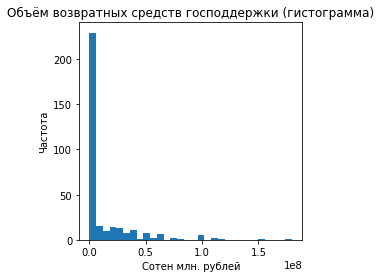

In [98]:
display(data['refundable_support'].describe())
data['refundable_support'].plot(kind='hist', bins=30, title='Объём возвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count           330.00
mean     49,233,297.92
std      60,073,639.80
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      41,125,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

Text(0, 0.5, 'Частота')

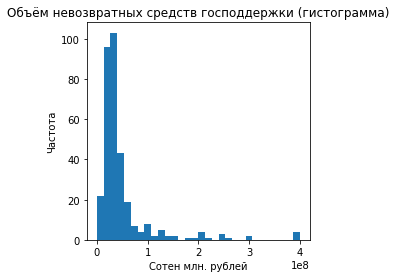

In [99]:
display(data['nonrefundable_support'].describe())
data['nonrefundable_support'].plot(kind='hist', bins=30, title='Объём невозвратных средств господдержки (гистограмма)', figsize=(4, 4))
plt.xlabel('Сотен млн. рублей')
plt.ylabel('Частота')

count             330.00
mean      127,835,768.11
std       188,996,337.04
min                 0.00
25%        42,404,381.75
50%        69,118,977.00
75%       145,905,958.50
max     2,305,074,303.00
Name: budget, dtype: float64

Text(0, 0.5, 'Частота')

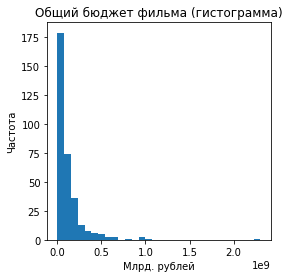

In [100]:
display(data['budget'].describe())
data['budget'].plot(kind='hist', bins=30, title='Общий бюджет фильма (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд. рублей')
plt.ylabel('Частота')

count   6,473.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

Text(0, 0.5, 'Частота')

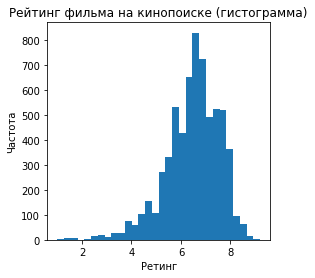

In [101]:
display(data['ratings'].describe())
data['ratings'].plot(kind='hist', bins=30, title='Рейтинг фильма на кинопоиске (гистограмма)', figsize=(4, 4))
plt.xlabel('Ретинг')
plt.ylabel('Частота')

count           3,140.00
mean       76,744,746.17
std       240,841,410.32
min                 0.00
25%            87,885.75
50%         2,357,735.25
75%        24,206,198.43
max     3,073,568,690.79
Name: box_office, dtype: float64

Text(0, 0.5, 'Частота')

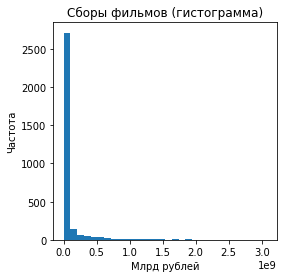

In [102]:
display(data['box_office'].describe())
data['box_office'].plot(kind='hist', bins=30, title='Сборы фильмов (гистограмма)', figsize=(4, 4))
plt.xlabel('Млрд рублей')
plt.ylabel('Частота')

Видно, что нули затрудяют анализ. В частности удивляет, что есть фильмы с нулевым общим бюджетом. Посмотрим на них.

In [103]:
data.query('budget==0').head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2040,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",РОССИЯ,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2045,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",РОССИЯ,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2456,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",РОССИЯ,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2516,Бармен,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",РОССИЯ,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2599,Савва Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",РОССИЯ,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"


In [104]:
data.query('budget==0').count()

title                    17
pu_number                17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Таких строк 17 и в них явно ошибка. Плюс так как их мало удалим их. Вычисления подсказывают, что мы можем сделать это в контексте госфинансирования(останется достаточно строк).

In [105]:
display(f'{((330-17)/332):.2%}')

'94.28%'

In [106]:
data = data.query('budget!=0').reset_index(drop=True)

Нули есть так же в возвратном и невозвратном госфинансировании. И по отдельности они могут быть. Но если они и там, и там то это строка с ошибкой. И даже если там указан общий бюджет это ошибка так как бюджет указан только у имеющих госфинансирование, а если оно по нулям, то некорректно. Посмотрим сколько таких.

In [107]:
data.query('refundable_support==0 & nonrefundable_support==0').count()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Таких нет значит оставляем как есть.

Следующая гипотеза, что ошибка может быть, если общий бюджет будет меньше суммы всего госфинансирования.

Проверим сколько таких.

In [108]:
data.query('refundable_support+nonrefundable_support>budget').count()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Эта гипотеза так же не подтвердилась.

Посмотрим, что у нас есть на данный момент.

In [109]:
#data.hist(bins=30, figsize=(15,20))
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,313.00,313.00,313.00,"6,457.00","3,123.00"
mean,"11,677,316.29","48,367,472.35","134,778,924.84",6.48,"76,274,469.73"
std,"25,214,706.40","59,988,148.18","191,643,121.41",1.10,"240,741,348.54"
min,0.00,0.00,"15,010,000.00",1.00,0.00
25%,0.00,"25,000,000.00","46,154,000.00",5.90,"85,671.50"
50%,0.00,"30,000,000.00","74,071,918.00",6.60,"2,330,104.00"
75%,"10,000,000.00","40,000,000.00","150,008,573.00",7.20,"23,667,864.95"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


- В 'refundable_support' есть явный пик, тех кто не получал такую поддержку, этот пик важен удалить его мы не можем. 
- 'nonrefundable_support' имеет вид нормального распределения, которое искажено наличем больших сумм финансирования, их тоже убирать не стоит, так как они важны для анализы.
- 'ratings' соответствует нормальному распределению, со сдвигом вправо, что показывает, что фильмы из списка скорее нравятся посетителям кинопоиска, чем не нравятся, что логично в контексте того, что им выдали удостоверение, потому что у них есть перспектива быть интересными.
- Теперь посмотрим 'box_office' и обнаружим колоссальную разницу в цифрах. И это нормально, ведь тут имеет место быть колоссальный разброс, кто-то зарабатывает много, кто-то мало.

**Также стоит разделить на сегменты 'box_office' на Q1, Q2, Q3, Q4. Это нужно, для дальнейшего анализа**

In [110]:
data['box_office'].describe()

count           3,123.00
mean       76,274,469.73
std       240,741,348.54
min                 0.00
25%            85,671.50
50%         2,330,104.00
75%        23,667,864.95
max     3,073,568,690.79
Name: box_office, dtype: float64

In [111]:
def bo_segment(bo):
    if bo>data['box_office'].describe().loc['75%']:
        return 'bo_Q4'
    elif bo>data['box_office'].median():
        return 'bo_Q3'
    elif bo>data['box_office'].describe().loc['25%']:
        return 'bo_Q2'
    elif  bo>=data['box_office'].describe().loc['min']:
        return 'bo_Q1'
    else:
        return None

In [112]:
data['bo_segment'] = data['box_office'].apply(bo_segment)

count           3,123.00
mean       76,274,469.73
std       240,741,348.54
min                 0.00
25%            85,671.50
50%         2,330,104.00
75%        23,667,864.95
max     3,073,568,690.79
Name: box_office, dtype: float64

Text(0, 0.5, 'Частота')

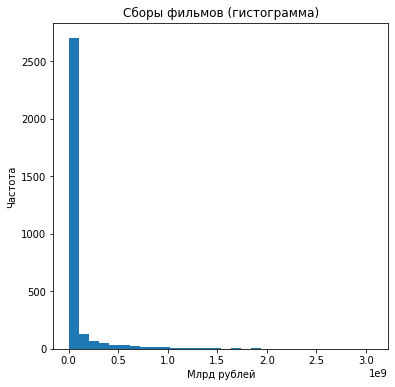

In [113]:
#data.pivot_table(index='pu_number', columns='bo_segment', values='box_office').hist(bins=30, figsize=(12,16))
display(data['box_office'].describe())
data['box_office'].plot(kind='hist', bins=30, title='Сборы фильмов (гистограмма)', figsize=(6, 6))
plt.xlabel('Млрд рублей')
plt.ylabel('Частота')

Можем сделать следующий вывод о структуре 'box_office', есть очень большое множество очень маленьких сборов - bo_Q1, а также очень маленькое множество очень больших сборов - bo_Q4, и куда более равномерный центр bo_Q2 и bo_Q3.

In [114]:
display(f'{(data.shape[0]/joint_data.shape[0]):.2%}')

'98.90%'

А данных в сохранности достаточно. Переходим к следующему этапу.

#### Шаг 2.6. Добавим новые столбцы





- **Создайём столбец с информацией о годе проката. Выделяем год из даты премьеры фильма.**

In [116]:
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year

In [117]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,bo_segment,show_start_year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,7.20,"боевик,драма,мелодрама",NaN,None,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,None,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,6.60,"драма,военный",NaN,None,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2015
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,None,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,7.70,драма,NaN,None,2016
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,8.30,"мелодрама,комедия","2,700.00",bo_Q1,2013
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.60,"мюзикл,мелодрама,комедия",NaN,None,2014
8,Отпетые мошенники,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",ФРАНЦИЯ,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,8.00,"комедия,криминал",NaN,None,2016
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,ВЕНГРИЯ",В.Титов,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,7.80,"мелодрама,комедия",NaN,None,2014


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7404 non-null   object 
 1   pu_number              7404 non-null   object 
 2   show_start_date        7404 non-null   object 
 3   type                   7404 non-null   object 
 4   film_studio            7404 non-null   object 
 5   production_country     7404 non-null   object 
 6   director               7404 non-null   object 
 7   producer               6841 non-null   object 
 8   age_restriction        7404 non-null   object 
 9   refundable_support     313 non-null    float64
 10  nonrefundable_support  313 non-null    float64
 11  budget                 313 non-null    float64
 12  financing_source       7404 non-null   object 
 13  ratings                6457 non-null   float64
 14  genres                 6451 non-null   object 
 15  box_

- **Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.**

Для начала напишем вспомогательную функцию для этого:

In [118]:
def take_first(string):
    if string!=None:
        k = list(string)
        for i in range(len(k)):    
            if k[i]==',':
                string = ''.join(map(str, k[:i]))
                return string
    return string

Затем выполним:

In [119]:
data['main_genre'] = data['genres'].apply(take_first)
data['main_director'] = data['director'].apply(take_first)

Затем проверим:

In [120]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,bo_segment,show_start_year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,7.20,"боевик,драма,мелодрама",NaN,None,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,None,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,6.60,"драма,военный",NaN,None,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2015,фантастика,Тимур Бекмамбетов
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,None,«6+» - для детей старше 6 лет,NaN,NaN,NaN,без господдержки,7.70,драма,NaN,None,2016,драма,В.Абдрашитов
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,8.30,"мелодрама,комедия","2,700.00",bo_Q1,2013,мелодрама,В.Меньшов
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,6.60,"мюзикл,мелодрама,комедия",NaN,None,2014,мюзикл,Джон Туртурро
8,Отпетые мошенники,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",ФРАНЦИЯ,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,без господдержки,8.00,"комедия,криминал",NaN,None,2016,комедия,Эрик Беснард
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,ВЕНГРИЯ",В.Титов,None,«12+» - для детей старше 12 лет,NaN,NaN,NaN,без господдержки,7.80,"мелодрама,комедия",NaN,None,2014,мелодрама,В.Титов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7404 non-null   object 
 1   pu_number              7404 non-null   object 
 2   show_start_date        7404 non-null   object 
 3   type                   7404 non-null   object 
 4   film_studio            7404 non-null   object 
 5   production_country     7404 non-null   object 
 6   director               7404 non-null   object 
 7   producer               6841 non-null   object 
 8   age_restriction        7404 non-null   object 
 9   refundable_support     313 non-null    float64
 10  nonrefundable_support  313 non-null    float64
 11  budget                 313 non-null    float64
 12  financing_source       7404 non-null   object 
 13  ratings                6457 non-null   float64
 14  genres                 6451 non-null   object 
 15  box_

Всё корректно.

- **Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.**

Затем округли до 2 знаков после запятой.

In [121]:
data['percent_support'] = round((data['refundable_support']+data['nonrefundable_support'])/data['budget'], 2)

Проверим.

In [122]:
data.loc[data['percent_support'].notna() ].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,bo_segment,show_start_year,main_genre,main_director,percent_support
1277,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",РОССИЯ,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",bo_Q2,2013,драма,А.Атанесян,0.33
1441,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",РОССИЯ,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,None,"28,140.00",bo_Q1,2014,None,А.Якимчук,0.70
1489,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",РОССИЯ,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",bo_Q3,2013,комедия,Р.Давлетьяров,0.61
1515,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",РОССИЯ,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",bo_Q1,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69
1782,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",РОССИЯ,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",bo_Q2,2014,драма,М.Угаров,0.62
1843,Тайна Сухаревой башни Чародей равновесия,114000115,2015-02-18,Анимационный,"ООО ""Студия ""Мастер-Фильм""",РОССИЯ,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,"51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",bo_Q3,2015,мультфильм,С.Серегин,0.48
1859,А зори здесь тихие,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",РОССИЯ,Р.Давлетьяров,None,«12+» - для детей старше 12 лет,"50,000,000.00",...,"220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",bo_Q4,2015,драма,Р.Давлетьяров,0.68
1860,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","РОССИЯ,ФРАНЦИЯ,ЛАТВИЯ",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,...,"86,210,067.00","Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50",bo_Q3,2014,драма,В.Глаголева,0.54
1890,Призрак,111001815,2015-03-02,Художественный,"ООО ""Водород 2011""",РОССИЯ,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,"139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",bo_Q4,2015,триллер,А.Войтинский,0.54
1899,Ведьма,111002215,2015-03-05,Художественный,"ООО ""Кинокомпания ""Ракурс""",РОССИЯ,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,...,"48,571,430.00",Министерство культуры,7.40,"фэнтези,приключения,драма","51,907.50",bo_Q1,2015,фэнтези,Д.Федоров,0.70


Всё корректно.

- Цель раздела: провести предобработка данных
- Результаты: удалены неявные дубликаты, явных не обнаружены; преобразованы типы данных столбцов на релевантные, удалены строки с некорректными значениями (например бюджетом равным нулю), поставлена заглушка на financing_source.
- 1) Преодоленные проблемы: Избыток информации о жанрах и режессёрах исправлен введением новых столбцов с первыми жанром и режессером соответственно. 2)Также разделен на сегменты 'box_office' (на Q1, Q2, Q3, Q4) для большей информативности дальнейшего исследования.
- Рекомендации: опора на сегменты 'box_office' (на Q1, Q2, Q3, Q4), так как это точное разделение на группы по сборам удобно для построения сводных таблиц и наглядности выводов.

### Шаг 3. Проведение исследовательского анализа данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

Составим релевантную сводную таблицу и поэтапно преобразуем её:

,box_office,pu_number
show_start_year,,
2010,105,974
2011,109,619
2012,126,590
2013,184,626
2014,277,803
2015,454,691
2016,519,809
2017,354,501
2018,469,871


,number_of_bo,number_of_films
show_start_year,,
2010,105,974
2011,109,619
2012,126,590
2013,184,626
2014,277,803
2015,454,691
2016,519,809
2017,354,501
2018,469,871


,number_of_bo,number_of_films,bo_inf_share
show_start_year,,,
2010,105,974,0.11
2011,109,619,0.18
2012,126,590,0.21
2013,184,626,0.29
2014,277,803,0.34
2015,454,691,0.66
2016,519,809,0.64
2017,354,501,0.71
2018,469,871,0.54


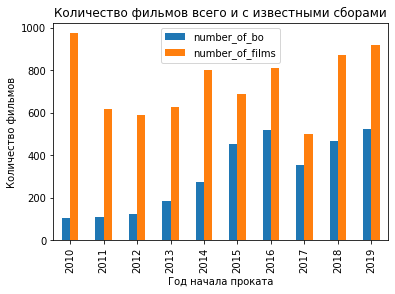

In [123]:
years_data = data.pivot_table(index='show_start_year', values=['pu_number', 'box_office'], aggfunc='count')
display(years_data)
years_data.columns = ['number_of_bo','number_of_films']
display(years_data)
years_data.plot(kind='bar', title='Количество фильмов всего и с известными сборами')
plt.xlabel('Год начала проката')
plt.ylabel('Количество фильмов')
years_data['bo_inf_share'] = round(years_data['number_of_bo']/years_data['number_of_films'], 2)
display(years_data)


Количество фильмов с известными сборами имеет динамику роста с 2010 по 2016, просадку в 2017 и возобновление роста в 2018-2019 годах. Общее количество фильмов было пиковым в 2010 году, потом были бессистемные спада и подъемы и к 2018-2019 годам стаблизировалось на том же уровне, что и в 2010 году.

Text(0, 0.5, 'Доля данных по фильмам со сборами')

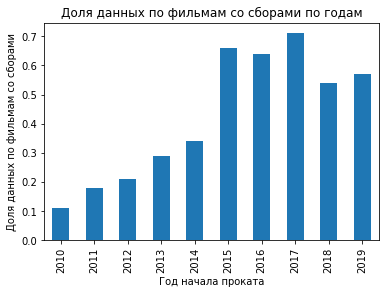

In [124]:
years_data['bo_inf_share'].plot(kind='bar', title='Доля данных по фильмам со сборами по годам')
plt.xlabel('Год начала проката')
plt.ylabel('Доля данных по фильмам со сборами')

С 2010 по 2017 каждый год приростала доля данных со сборами, за весь этот период доля выросла более, чем в 6 раз. Потом в 2018 просадка и небольшой прирост в 2019. Лучшие 3 года по полноте данных 2015-2017.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

- С помощью сводной таблицы посчитаем также среднюю и медианную сумму сборов для каждого года.

,min,max,mean,median
,box_office,box_office,box_office,box_office
show_start_year,,,,
2010,0.00,1446400.00,23130.04,1700.00
2011,125.00,11618085.00,129383.17,3000.00
2012,0.00,2311220.00,54835.98,5660.00
2013,0.00,19957031.50,161954.92,3522.50
2014,0.00,1016410635.30,26840121.11,18160.00
2015,0.00,1658861425.50,83692794.41,4864744.05
2016,0.00,2048126108.00,90055388.36,3915041.02
2017,7900.00,2779686144.00,136887314.39,9943877.50


,min,max,mean,median
,box_office,box_office,box_office,box_office
count,10.00,10.00,10.00,10.00
mean,5489.24,1288373974.46,53463101.03,3234039.39
std,13266.79,1234483422.87,53166393.88,3863874.17
min,0.00,1446400.00,23130.04,1700.00
25%,0.00,13702821.62,137526.11,4056.88
50%,0.00,1337636030.40,55266457.76,1966600.51
75%,3330.05,2215847030.39,91344836.85,4821954.69
max,42469.00,3073568690.79,136887314.39,9943877.50


Text(0, 0.5, 'Млрд рублей')

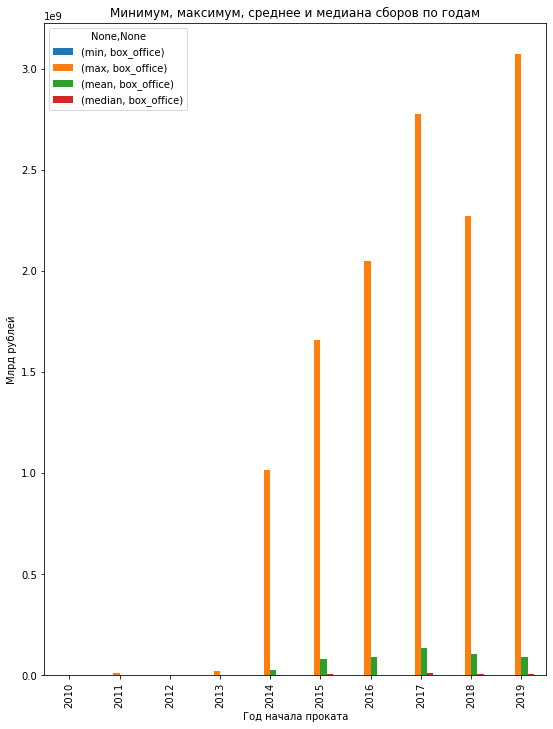

In [125]:
bo_data = data.pivot_table(index='show_start_year', values=['box_office'], aggfunc=['min','max','mean','median'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(bo_data)
display(bo_data.describe())
bo_data.plot(kind='bar', title='Минимум, максимум, среднее и медиана сборов по годам',figsize=(9, 12))
plt.xlabel('Год начала проката')
plt.ylabel('Млрд рублей')

График показывает системный рост сборов самых кассовых фильмов из года в год, рост, а потом стабильность среднего арифметического. А главное скачок обоих с 2014 года (включительно).

Среднее арифметическое системно больше, чем медиана, судя по графику('Минимум, максимум, среднее и медиана сборов по годам'). Значит есть категория фильмов - блокбастеры, у которых существенно выше сборы, чем у большинства фильмов и именно они оттягивают среднее арифметическое вверх по сравнению с медианой.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

sum  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
show_start_year                                          
2015                                      379054578.37   
2016                                      150034321.67   
2017                                      229598930.00   
2018                                       32449002.11   
2019                                       17746066.82   

                                                 \
                                                  
age_restriction «12+» - для детей старше 12 лет   
show_start_year                                   
2015                             13419509570.51   
2016                             11150762103.96   
2017                              7851389700.67   
2018                             14267250435.69   
2019                             12680198773.67   

                                                                             \
                                                                              
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
show_start_year                                                               
2015                             10780799231.27               5428920769.93   
2016                             16594166649.74               6790637473.87   
2017                             18694590951.06               9651495581.02   
2018                             16278405946.93               8758498279.64   
2019                             12748819511.65              10121796303.64   

                                               
                                               
age_restriction «6+» - для детей старше 6 лет  
show_start_year                                
2015                            7988244512.31  
2016                           12053146008.24  
2017                           12031034131.00  
2018                            9913759294.32  
2019                           12704906832.35

Text(0, 0.5, 'Млрд рублей')

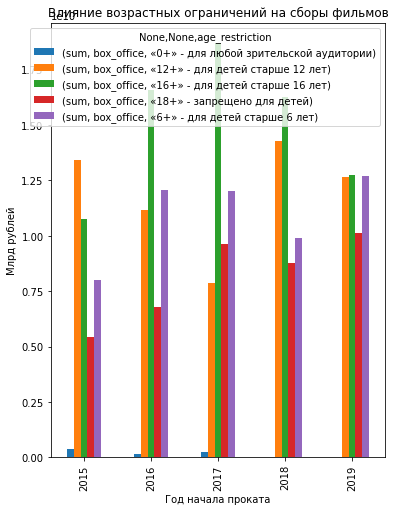

In [126]:
ar_data = data.pivot_table(index='show_start_year', columns='age_restriction', values=['box_office'], aggfunc=['sum'])
ar_data = ar_data.loc[2015:2019, :]
display(ar_data)
ar_data.plot(kind='bar', title='Влияние возрастных ограничений на сборы фильмов', figsize=(6, 8))
plt.xlabel('Год начала проката')
plt.ylabel('Млрд рублей')

- Больше всего собрали фильмы 16+, что связанно с тем, что преимущественный зритель подростки (с тех пор как распался СССР, потому что западное кино было интересно подросткам, а старшие поколения утратили привычку ходить в кино), но в 2019 фильмы 12+  и 6+ тоже нагнали 16+, это связанно, что выросшие люди, которые в ранние 2000ые были подростками и ходили в кино, завели своих детей и они подросли и пошли в кино с родителями.
- А что стабильно меньше всех собирали это мультфильмы 0+, так как малышей до 6 лет реже всего водят в кино, а родители их зачастую слишком взрослые, чтобы получать удовольствие от настолько детского контента.

**Промежуточные выводы по разделу исследовательский анализ данных, определние трендов**

Динамика количества фильмов с известными сборами:
- С 2010 по 2016 количество фильмов с известными сборами росло.
- В 2017 году количество фильмов снизилось, но в 2018-2019 годах снова начало расти.
- В 2010 году количество фильмов было пиковым, затем последовали бессистемные спады и подъемы.

Доля данных со сборами:
- С 2010 по 2017 доля данных со сборами росла, увеличившись более чем в 6 раз.
- В 2018 году доля данных снизилась, но в 2019 году снова немного выросла.
- Лучшие 3 года по полноте данных: 2015-2017.

Рост сборов самых кассовых фильмов:
- График показывает системный рост сборов самых кассовых фильмов из года в год.
- С 2014 года наблюдается скачок сборов.
- Среднее арифметическое сборов больше, чем медиана, что указывает на наличие блокбастеров с высокими сборами.

Возрастные категории зрителей:
- Фильмы 16+ собрали больше всего, так как их предпочитают подростки.
- В 2019 году фильмы 12+ и 6+ также нагнали 16+.
- Мультфильмы 0+ стабильно собирают меньше всего, так как малышей до 6 лет редко водят в кино.

Определены тренды и динамика рынка кинопроката России. Цифры  даты выше описываюто точно и ёмко эти нюансы.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [127]:
info_plus(data)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,bo_segment,show_start_year,main_genre,main_director,percent_support
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,без господдержки,7.20,"боевик,драма,мелодрама",NaN,None,2015,боевик,Кевин Костнер,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,None,«6+» - для детей старше 6 лет,NaN,...,NaN,без господдержки,6.60,"драма,военный",NaN,None,2016,драма,Е.Матвеев,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016,фантастика,Тимур Бекмамбетов,NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2016,фантастика,Тимур Бекмамбетов,NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,без господдержки,6.80,"фантастика,боевик,триллер",NaN,None,2015,фантастика,Тимур Бекмамбетов,NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,None,«6+» - для детей старше 6 лет,NaN,...,NaN,без господдержки,7.70,драма,NaN,None,2016,драма,В.Абдрашитов,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,None,«12+» - для детей старше 12 лет,NaN,...,NaN,без господдержки,8.30,"мелодрама,комедия",2700.00,bo_Q1,2013,мелодрама,В.Меньшов,NaN
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,...,NaN,без господдержки,6.60,"мюзикл,мелодрама,комедия",NaN,None,2014,мюзикл,Джон Туртурро,NaN
8,Отпетые мошенники,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",ФРАНЦИЯ,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,...,NaN,без господдержки,8.00,"комедия,криминал",NaN,None,2016,комедия,Эрик Беснард,NaN
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,ВЕНГРИЯ",В.Титов,None,«12+» - для детей старше 12 лет,NaN,...,NaN,без господдержки,7.80,"мелодрама,комедия",NaN,None,2014,мелодрама,В.Титов,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7404 non-null   object 
 1   pu_number              7404 non-null   object 
 2   show_start_date        7404 non-null   object 
 3   type                   7404 non-null   object 
 4   film_studio            7404 non-null   object 
 5   production_country     7404 non-null   object 
 6   director               7404 non-null   object 
 7   producer               6841 non-null   object 
 8   age_restriction        7404 non-null   object 
 9   refundable_support     313 non-null    float64
 10  nonrefundable_support  313 non-null    float64
 11  budget                 313 non-null    float64
 12  financing_source       7404 non-null   object 
 13  ratings                6457 non-null   float64
 14  genres                 6451 non-null   object 
 15  box_

median                  
                                 percent_support                  
bo_segment                                 bo_Q1 bo_Q2 bo_Q3 bo_Q4
financing_source                                                  
Министерство культуры                       0.69  0.65  0.50  0.35
Министерство культуры, Фонд кино            0.56  0.62  0.59  0.51
Фонд кино                                   0.36  0.50  0.59  0.50

Text(0, 0.5, 'Процент господдержки')

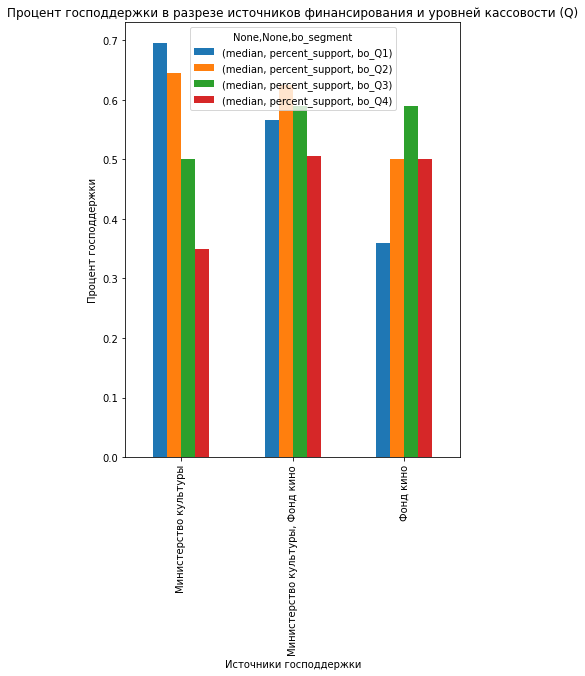

In [128]:
r_data = data.pivot_table(index='financing_source', columns='bo_segment', values=['percent_support'], aggfunc=['median'])
display(r_data)
r_data.plot(kind='bar', title= 'Процент господдержки в разрезе источников финансирования и уровней кассовости (Q)', figsize=(6, 8))
plt.xlabel('Источники господдержки')
plt.ylabel('Процент господдержки')

- **Интересная закономерность, что, когда деньги выделяет МК, чем выше процент участия, тем более малокассовой категории фильмов будут относится полученные фильмы.**

median                          \
                                      budget                           
bo_segment                             bo_Q1       bo_Q2       bo_Q3   
financing_source                                                       
Министерство культуры            44022525.00 40800400.00 61394662.50   
Министерство культуры, Фонд кино 64780373.00 65830303.00 70086439.00   
Фонд кино                        90822766.00 94404613.00 74275100.00   

                                               
                                               
bo_segment                              bo_Q4  
financing_source                               
Министерство культуры            101463696.00  
Министерство культуры, Фонд кино 224224661.50  
Фонд кино                        179708770.00

median                                     
                budget                                     
bo_segment       bo_Q1       bo_Q2       bo_Q3        bo_Q4
count             3.00        3.00        3.00         3.00
mean       66541888.00 67011772.00 68585400.50 168465709.17
std        23449794.04 26821629.60  6570103.12  62147956.32
min        44022525.00 40800400.00 61394662.50 101463696.00
25%        54401449.00 53315351.50 65740550.75 140586233.00
50%        64780373.00 65830303.00 70086439.00 179708770.00
75%        77801569.50 80117458.00 72180769.50 201966715.75
max        90822766.00 94404613.00 74275100.00 224224661.50

Text(0, 0.5, 'Сотни млн рублей бюджета')

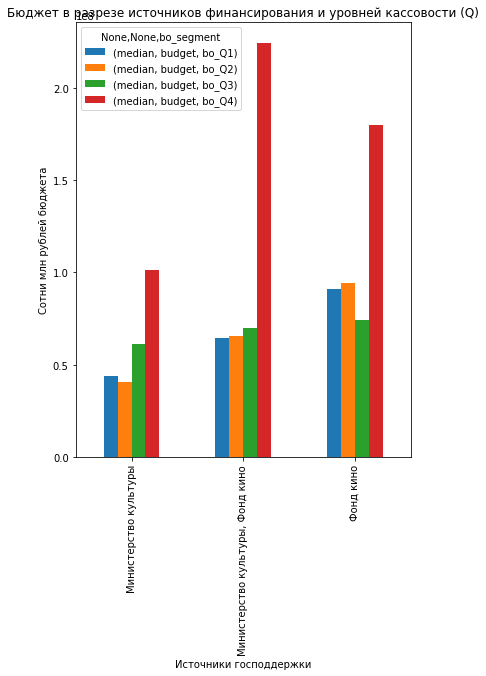

In [129]:
r_data = data.pivot_table(index='financing_source', columns='bo_segment', values=['budget'], aggfunc=['median'])
display(r_data)
display(r_data.describe())
r_data.plot(kind='bar', title= 'Бюджет в разрезе источников финансирования и уровней кассовости (Q)', figsize=(6, 8))
plt.xlabel('Источники господдержки')
plt.ylabel('Сотни млн рублей бюджета')

- **Интересная закономерность, блокбастерами при финансировании государством становятся высокобюджетные фильмы. Явно есть порог финансирования, который нужно преодолеть, чтобы собрать огромную кассу.**

median                  
                                 ratings                  
bo_segment                         bo_Q1 bo_Q2 bo_Q3 bo_Q4
financing_source                                          
Министерство культуры               6.10  6.20  6.20  6.50
Министерство культуры, Фонд кино    5.55  6.30  6.80  6.55
Фонд кино                           5.80  5.90  5.85  6.05
без господдержки                    6.60  6.30  6.30  6.40

Text(0, 0.5, 'Сотни млн рублей бюджета')

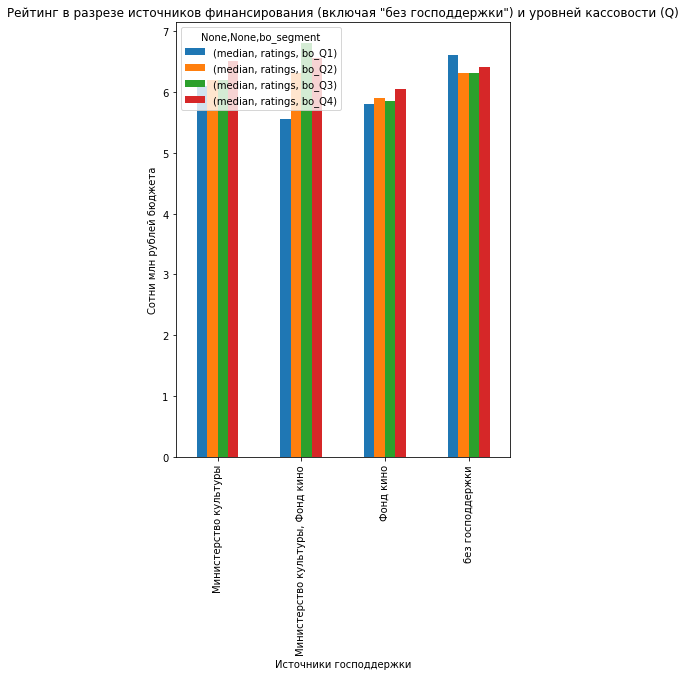

In [130]:
r_data = data.pivot_table(index='financing_source', columns='bo_segment', values=['ratings'], aggfunc=['median'])
display(r_data)
r_data.plot(kind='bar', title= 'Рейтинг в разрезе источников финансирования (включая "без господдержки") и уровней кассовости (Q)', figsize=(6, 8))
plt.xlabel('Источники господдержки')
plt.ylabel('Сотни млн рублей бюджета')

- **Ещё одна неочевидная закономерность, что средний рейтинг низок у всех фильмов с удостоверением МК независимо от господдержки и уровня сборов.**

In [132]:
r_data = data.query('financing_source!="без господдержки"').reset_index(drop=True)
r_data['box_office'].sum()-r_data['budget'].sum()

-2846764025.449997

Фильмы с госсподдержкой не окупились и ушли в большой минус, как это исправить в моих выводах ниже.

Промежуточные выводы:
1. Можем сделать следующий вывод о структуре 'box_office', есть очень большое множество очень маленьких сборов(см. bo_Q1), а также очень маленькое множество очень больших сборов (см. bo_Q4), и куда более равномерный центр (см. bo_Q2 и см. bo_Q3).
Благодаря этому ракурсу мы можем увидеть ряд закономерностей про фильмы с господдржкой:
- Интересная закономерность, что, когда деньги выделяет МК, чем выше процент участия, тем более малокассовой категории фильмов будут относится полученные фильмы. **Это означает, что если цель окупаемость, то МК нужно участвовать малыми долями.**
- Интересная закономерность, блокбастерами при финансировании государством становятся высокобюджетные фильмы. Явно есть порог финансирования, который нужно преодолеть, чтобы собрать огромную кассу. **Это означает, что если цель отечественные блокбастеры, то нужно вкладываться в крупные проекты.**
- Ещё одна неочевидная закономерность, что средний рейтинг низок у всех фильмов с удостоверением МК независимо от господдержки и уровня сборов. **Это означает, что не стоит ориентироваться на рейтинг кинопоиска, сборы куда более важный показатель, чем хейт из интернета.**

Соберём воедино: **Стоит финансировать как можно меньшей долей, как можно более крупные проекты и руководствоваться в качестве KPI кассовыми сборами, а не рейтингом Кинопоиска.**

### Шаг 5. Общий вывод

**Предобработка данных для исследования рынка кинопроката России.**

- Результаты: удалены дубликаты, преобразованы типы данных, удалены строки с некорректными значениями, поставлена заглушка на financing_source.

- Преодолены проблемы: избыток информации о жанрах и режессерах исправлен введением новых столбцов, данные разделены на сегменты 'box_office' для большей информативности.

- Рекомендации: опираться на сегменты 'box_office' для построения сводных таблиц и наглядности выводов.

**Результаты исследовательского анализа данных:**

- Динамика количества фильмов с известными сборами: с 2010 по 2016 количество росло, в 2017 снизилось, в 2018-2019 снова начало расти.

- Доля данных со сборами: с 2010 по 2017 росла, в 2018 снизилась, в 2019 немного выросла.

- Лучшие 3 года по полноте данных: 2015-2017.

- Рост сборов самых кассовых фильмов: скачок сборов с 2014 года, среднее арифметическое сборов больше медианы, указывающей на блокбастеры с высокими сборами.

- Возрастные категории зрителей: фильмы 16+ собрали больше всего, 12+ и 6+ нагнали 16+ в 2019 году, мультфильмы 0+ стабильно собирают меньше всего.

- Определены тренды и динамика рынка кинопроката России, структура 'box_office' имеет множество маленьких сборов и больших сборов, а также равномерный центр.

**Результат изучения фильмов с господдержкой:**

- Финансирование фильмов с господдержкой: чем выше процент участия, тем более малокассовой категории фильмов будут относиться полученные фильмы; блокбастерами при финансировании становятся высокобюджетные фильмы; средний рейтинг низок у всех фильмов с удостоверением МК независимо от господдержки и уровня сборов; стоит финансировать как можно меньшей долей, как можно более крупные проекты и руководствоваться кассовыми сборами, а не рейтингом Кинопоиска.